In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline 

scipy.stats.rankdata -> rank the data from low to high. If there's same value, use the average(by default) of the rank for them

In [23]:
# Example of ranking data
l = [10, 9, 5, 7, 5]
print('Raw data: ', l)
print('Ranking: ', list(stats.rankdata(l, method='average')))

Raw data:  [10, 9, 5, 7, 5]
Ranking:  [5.0, 4.0, 1.5, 3.0, 1.5]


Spearman Rank Correlation of $X$ & $Y$ :
$$r_S = 1 - \frac{6 \sum_{i=1}^n d_i^2}{n(n^2 - 1)}$$
where $d_i$ is the differents of the __RANK__ of $X_i$ & $Y_i$
The result will always be between  −1  and  1 .

### Example
$X$  from a poisson distribution (non-normal), and then set  $Y=e^X+ϵ$  where  $ϵ$  is drawn from another poisson distribution. 

In [24]:
def compare_correlation_and_spearman_rank(n, noise):
    X = np.random.poisson(size=n)
    Y = np.exp(X) + noise * np.random.poisson(size=n)
    Xrank = stats.rankdata(X, method='average')
    # n-2 is the second to last element
    Yrank = stats.rankdata(Y, method='average')

    diffs = Xrank - Yrank # order doesn't matter since we'll be squaring these values
    r_s = 1 - 6*sum(diffs*diffs)/(n*(n**2 - 1))
    c_c = np.corrcoef(X, Y)[0,1]
    
    return r_s, c_c

In [25]:
n = 100
experiments = 1000
spearman_dist = np.ndarray(experiments)
correlation_dist = np.ndarray(experiments)
for i in range(experiments):
    r_s, c_c = compare_correlation_and_spearman_rank(n, 1.0)
    spearman_dist[i] = r_s
    correlation_dist[i] = c_c
    
print('Spearman Rank Coefficient: ' + str(np.mean(spearman_dist)))
# Compare to the regular correlation coefficient
print('Correlation coefficient: ' + str(np.mean(correlation_dist)))

Spearman Rank Coefficient: 0.874607005701
Correlation coefficient: 0.770389067175


### Pearson's vs Spearman

Text(0,0.5,'Frequency')

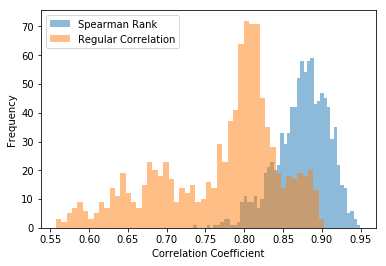

In [26]:
plt.hist(spearman_dist, bins=50, alpha=0.5)
plt.hist(correlation_dist, bins=50, alpha=0.5)
plt.legend(['Spearman Rank', 'Regular Correlation'])
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')

### Relationship between noise and coefficients:

Text(0,0.5,'Average Correlation Coefficient')

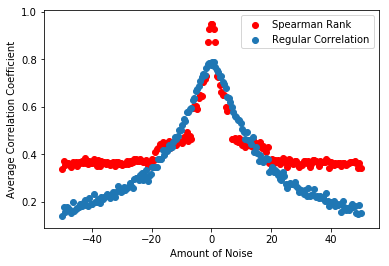

In [27]:
n = 100
noises = np.linspace(-50, 50, 200)
experiments = 100
spearman = np.ndarray(len(noises))
correlation = np.ndarray(len(noises))

for i in range(len(noises)):
    # Run many experiments for each noise setting
    rank_coef = 0.0
    corr_coef = 0.0
    noise = noises[i]
    for j in range(experiments):
        r_s, c_c = compare_correlation_and_spearman_rank(n, noise)
        rank_coef += r_s
        corr_coef += c_c
    spearman[i] = rank_coef/experiments
    correlation[i] = corr_coef/experiments
    
plt.scatter(noises, spearman, color='r')
plt.scatter(noises, correlation)
plt.legend(['Spearman Rank', 'Regular Correlation'])
plt.xlabel('Amount of Noise')
plt.ylabel('Average Correlation Coefficient')

Spearman rank correlation copes with the non-linear relationship much better at most levels of noise. Interestingly, at very high levels, it seems to do worse than regular correlation.
>Pearson's correlation -> measure the __linear__ relationship <br>
>Spearman rank correlation -> measure the __monotonic__ relationship

### Delay in correlation

In [28]:
n = 100

X = np.random.rand(n)
Y = [1,1] + list(X[:(n-2)])
Xrank = stats.rankdata(X, method='average')
# n-2 is the second to last element
Yrank = stats.rankdata([1,1] + list(X[:(n-2)]), method='average')

diffs = Xrank - Yrank # order doesn't matter since we'll be squaring these values
r_s = 1 - 6*sum(diffs*diffs)/(n*(n**2 - 1))
print("Spearman : %f" % r_s)
c_s = np.corrcoef(X,Y)[0,1]
print("Pearson : %f" % c_s)

Spearman : 0.077111
Pearson : 0.072988


Both __cannot__ detect shifted relation.

### Built in function

In [29]:
# Generate two random data sets
np.random.seed(161)
X = np.random.rand(10)
Y = np.random.rand(10)

r_s = stats.spearmanr(X, Y)
print('Spearman Rank Coefficient: ', r_s[0])
print('p-value: ', r_s[1])

Spearman Rank Coefficient:  0.236363636364
p-value:  0.510885317515


# Cross-Correlation vs. Auto-Correlation
-  Cross-correlation is the comparison of __two different time series__ to detect if there is a correlation between metrics with the __same maximum and minimum values__. For example: “Are two audio signals in phase?”
-  Normalized cross-correlation is also the comparison of two time series, but using a __different scoring result__. Instead of simple cross-correlation, it can compare metrics with different value ranges. For example: “Is there a correlation between the number of customers in the shop and the number of sales per day?”
-  Auto-correlation is the comparison of a time series with __itself at a different time__. It aims, for example, to detect repeating patterns or seasonality. For example: “Is there weekly seasonality on a server website?” “Does the current week’s data highly correlate with that of the previous week?”
-  Normalized auto-correlation is the same as normalized cross-correlation, but for auto-correlation, thus comparing one metric with itself at a different time.

## Cross-Correlation

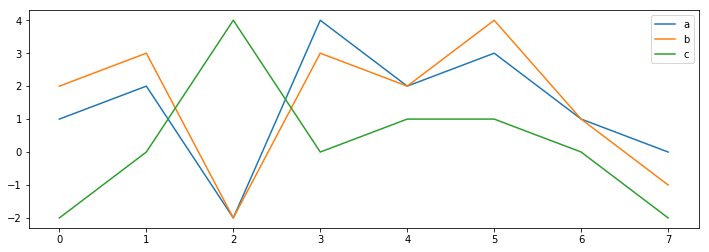

In [30]:
# plot the graph in R
a = np.array([1,2,-2,4,2,3,1,0])
b = np.array([2,3,-2,3,2,4,1,-1])
c = np.array([-2,0,4,0,1,1,0,-2])

plt.figure(figsize=(12,4))
plt.plot(a, label="a")
plt.plot(b, label="b")
plt.plot(c, label="c")
plt.legend()
# plot(ts(a), col="#f44e2e", lwd=2)
# lines(b, col="#27ccc0", lwd=2)
# lines(c, col="#273ecc", lwd=2)
# legend("topright", c("a","b","c"), 
#        col=c("#f44e2e","#27ccc0","#273ecc"), lty=c(1), lwd = 2)

cross-correlation formula between X & Y:
$$corr(X,Y) = \sum_{n=0}^{n-1} X[n]*Y[n]$$

In [31]:
corr_ab = np.dot(a,b)
corr_ac = np.dot(a,c)

## Normalized Cross-Correlation

Normalized Cross-Correlation formula:
$$norm\_corr(X,Y) = \frac{ \sum_{n=0}^{n-1} X[n]*Y[n]}{\sqrt{\sum_{n=0}^{n-1} X[n]^2 * \sum_{n=0}^{n-1} Y[n]^2}} $$

In [32]:
def norm_corr(X,Y):
    return np.dot(X,Y)/np.sqrt(np.dot(X,X)*np.dot(Y,Y))

In [33]:
norm_corr_ab = norm_corr(a,b)
norm_corr_ac = norm_corr(a,c)
print(norm_corr_ab)
print(norm_corr_ac)

0.947612835218
-0.157018573255


## Auto-Correlation

Auto-correlation is very useful in many applications; a common one is detecting repeatable patterns due to seasonality.

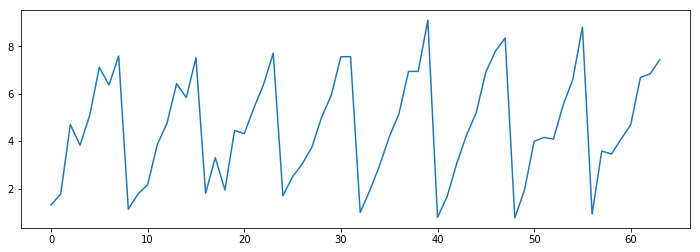

In [34]:
# generate sample with repeated pattern
np.random.seed(5)
ar = np.tile(np.linspace(1,8,8),8) + np.random.normal(0,0.7,64)
plt.figure(figsize=(12,4))
plt.plot(ar)

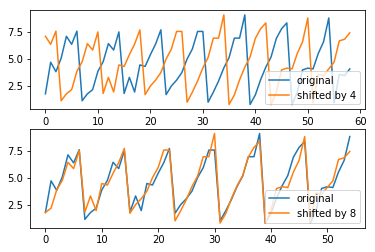

In [35]:
f, axarr = plt.subplots(2, sharex=False)
plt.figure(figsize=(12,4))
# shift the sample by 4
ar4 = ar[1:(len(ar)-4)]
ar4_shift = ar[5:len(ar)]
axarr[0].plot(ar4, label="original")
axarr[0].plot(ar4_shift, label="shifted by 4")
axarr[0].legend()
# shift the sample by 8
ar8 = ar[1:(len(ar)-8)]
ar8_shift = ar[9:len(ar)]
axarr[1].plot(ar8, label="original")
axarr[1].plot(ar8_shift, label="shifted by 8")
axarr[1].legend()

In [36]:
# Correlation
corr_arar4 = np.dot(ar4,ar4_shift) # ~1103
corr_arar8 = np.dot(ar8,ar8_shift) # ~1442

In [37]:
# Norm correlation
norm_corr_arar4 = norm_corr(ar4,ar4_shift) # 0.709665121391
norm_corr_arar8 = norm_corr(ar8,ar8_shift) # 0.987933651148

## Normalized Cross-Correlation with Time Shift

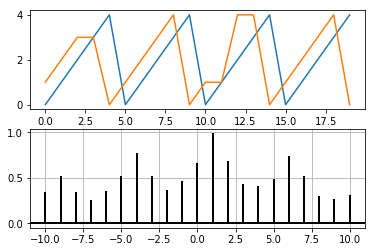

In [38]:
# Normalized Cross-Correlation for lags from -4 to 4
a = np.array([0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4])
b = np.array([1,2,3,3,0,1,2,3,4,0,1,1,4,4,0,1,2,3,4,0])
a = a.astype(float)
b = b.astype(float)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(a)
ax1.plot(b)
ax1.legend()

ax2 = fig.add_subplot(212)
res = ax2.xcorr(a, b, usevlines=True, normed=True, lw=2)
ax2.grid(True)
ax2.axhline(0, color='black', lw=2)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.63924351,  0.6040085 ,  0.61824721,  0.64448204,  0.71677464,
         0.79534151,  0.92743896,  0.8046264 ,  0.74158892,  0.69581543,
         0.70966512,  0.70510494,  0.75233838,  0.80505954,  0.92531067,
         0.76952662,  0.68610489,  0.59960547,  0.60714101,  0.59430744,
         0.63924891]),
 <matplotlib.lines.Line2D at 0x1a16ffa5f8>)

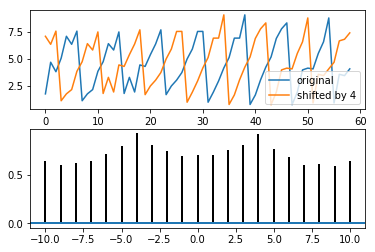

In [39]:
f, axarr = plt.subplots(2, sharex=False)
plt.figure(figsize=(12,4))
# shift the sample by 4
ar4 = ar[1:(len(ar)-4)]
ar4_shift = ar[5:len(ar)]
axarr[0].plot(ar4, label="original")
axarr[0].plot(ar4_shift, label="shifted by 4")
axarr[0].legend()

axarr[1].xcorr(ar4,ar4_shift, usevlines=True, normed=True, lw=2)

# Real world Example

In [5]:
from StockCrawler.StockCrawler import load_yahoo_quote
# StockCrawler repo: https://github.com/ryanwcyin/StockCrawler.git
START_DATE = '20160101'
END_DATE = '20180101'
gld_df = load_yahoo_quote('gld',START_DATE,END_DATE)
gdx_df = load_yahoo_quote('gdx',START_DATE,END_DATE)
# Following code work only on quantopian
# assets = [symbols('gld'),symbols('gdx')] # gold & gold miner
# prices = get_pricing(assets,'01/01/2016','01/01/2018', fields='price') # get the prices
# prices

In [6]:
gld = gld_df['Close'].pct_change().dropna()
gdx = gdx_df['Close'].pct_change().dropna()

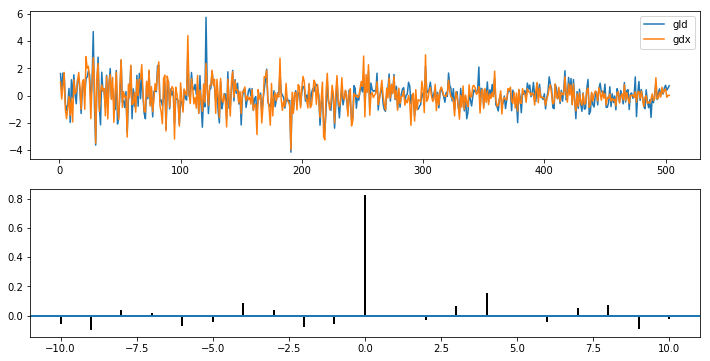

In [8]:
norm_gld = (gld - np.nanmean(gld))/np.nanstd(gld)
norm_gdx = (gdx - np.nanmean(gdx))/np.nanstd(gdx)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(211)
ax1.plot(norm_gld, label='gld')
ax1.plot(norm_gdx, label='gdx')
ax1.legend()

ax2 = fig.add_subplot(212)
xcorrelate = ax2.xcorr(norm_gld, norm_gdx , usevlines=True, normed=True, lw=2)

So, gold and gdx are highly correlated at lag = 0.

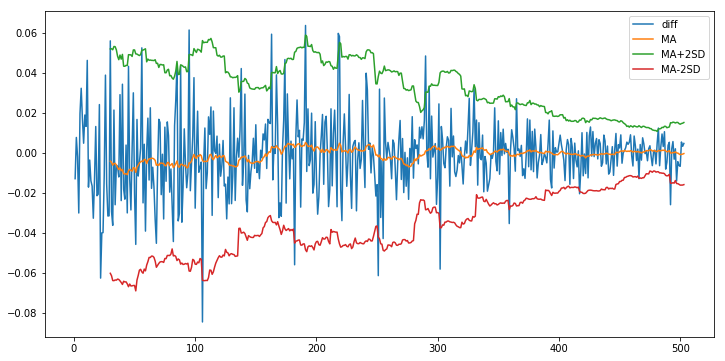

In [10]:
diff = gld-gdx # difference
MA30 = diff.rolling(30).mean()
std30 = diff.rolling(30).std()
upper = MA30 + 2*std30
lower = MA30 - 2*std30
plt.figure(figsize=(12,6))
plt.plot(diff ,label='diff')
plt.plot(MA30,label='MA')
plt.plot(upper ,label='MA+2SD')
plt.plot(lower ,label='MA-2SD')
plt.legend()